<a href="https://www.analytiksinc.com">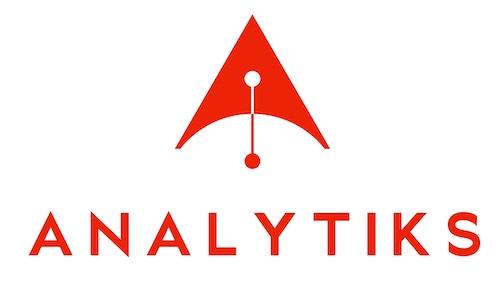</a>
<p style="text-align: right;"> © 2021. Analytiks Inc. </p>

# Time Series Analysis

## Import Libraries

Importing plotly failed. Interactive plots will not work.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Order_ID         9800 non-null   object        
 1   Request_Date     9800 non-null   datetime64[ns]
 2   Completion_Date  9800 non-null   object        
 3   Customer_ID      9800 non-null   object        
 4   Customer_Name    9800 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 459.4+ KB
Start Date: 2015-01-02 00:00:00 | End Date: 2018-12-30 00:00:00 


FileNotFoundError: [Errno 2] No such file or directory: 'graph/data1.png'

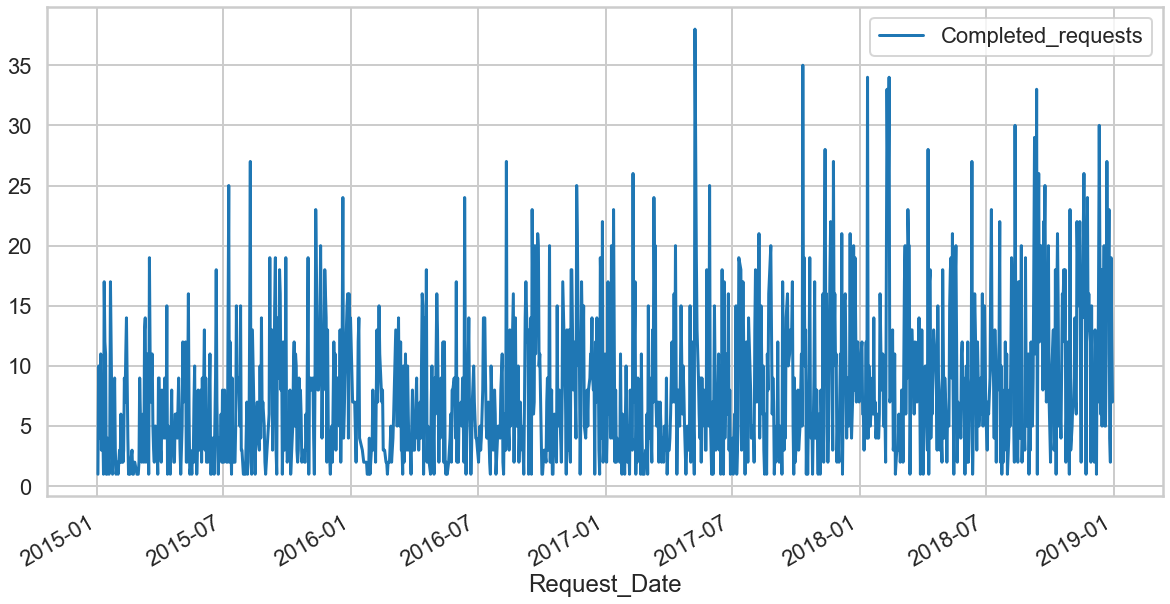

In [1]:
while True:
    #ignore warnings
    import warnings
    from matplotlib import pyplot as plt
    warnings.filterwarnings('ignore')
    GRAPHsavingfolderPATH = 'graph'
    CSVfolderPATH="https://docs.google.com/spreadsheets/d/e/2PACX-1vTFkpEgjskKnKHUk83grdb1rtxKRCka27WzdFXuOUyzVZIk56uIicPNaQyuN8HSOcreeSPnXgkfNS0d/pub?output=csv"
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import base64
    import seaborn as sns
    sns.set_style("whitegrid")
    sns.set_context("poster")
    
    %matplotlib inline
    #FBProphet
    from fbprophet import Prophet
    
    #Metrics
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    def forecast_metrics(y_true, y_pred):
        """Calculate MAE, MSE, RMSE, and MAPE of the forecast.
        
           Args:
               y_true: actual results
               y_pred: predicted results
        """
        
        #MAE
        mae = mean_absolute_error(y_true, y_pred)
        
        #MSE
        mse = mean_squared_error(y_true, y_pred)
        
        #RMSE
        rmse = np.sqrt(mse)
        
        #MAPE
        mape = np.mean(np.abs(y_pred - y_true)/np.abs(y_true))
        
        print(("MAE: %.2f") % mae)
        print(("MSE: %.2f") % mse)
        print(("RMSE: %.2f") % rmse)
        print(("MAPE: %.2f") % (mape * 100))
    df = pd.read_csv(CSVfolderPATH, index_col=0, parse_dates=['Request_Date'])
    df.head()
    df.info()
    df.nunique()
    daily = df.groupby('Request_Date').agg({'Order_ID':['count']})
    
    daily.columns = ['Completed_requests']
    
    daily.head()
    print("Start Date: %s | End Date: %s " % (daily.index.min(),daily.index.max()))
    #Plot the Data
    daily.plot(kind='line', figsize = (20,10))
    plt.savefig(GRAPHsavingfolderPATH+'/data1.png', bbox_inches='tight')
    def get_base64_encoded_image(image_path):
        with open(image_path, "rb") as img_file:
            return base64.b64encode(img_file.read()).decode('utf-8')
    #Get Monthly Data
    monthly = daily.resample('M').apply(sum)
    
    monthly.head()
    #Plot the Data
    monthly.plot(kind='line', figsize = (20,10))
    plt.savefig(GRAPHsavingfolderPATH+'/requests2.png', bbox_inches='tight')
    oneimage=(get_base64_encoded_image(GRAPHsavingfolderPATH+'/requests2.png'))
    #We'll use the last 12 months for testing, and the remaining months for training
    
    test = monthly[monthly.index.year == 2018]
    
    train = monthly[monthly.index.year < 2018]
    train.shape, test.shape
    print("Train: Start Date: %s |  End Date: %s " % (train.index.min(),train.index.max()))
    print("Test: Start Date: %s |  End Date: %s " % (test.index.min(),test.index.max()))
    #Convert our dataframe to the format required by Prophet
    
    train_fb = train.reset_index()
    train_fb.columns = ['ds','y']
    
    test_fb = test.reset_index()
    test_fb.columns = ['ds','y']
    
    train_fb.head()
    #Instantiate the model
    
    model = Prophet(seasonality_mode='multiplicative')
    
    model.fit(train_fb)
    #Create DataFrame for Forecasts
    future = model.make_future_dataframe(periods=12, freq='M')
    future
    #Get Forecasts
    forecast = model.predict(future)
    
    forecast.tail(n=12)
    #Plot the Forecast
    fig1 = model.plot(forecast, figsize=(20,10))
    plt.savefig(GRAPHsavingfolderPATH+'/forecast3.png', bbox_inches='tight')
    #Plot the Components
    fig2 = model.plot_components(forecast, figsize=(20,10))
    plt.savefig(GRAPHsavingfolderPATH+'/components4.png', bbox_inches='tight')
    #Join with actual results to get the metrics 
    results_df = pd.merge(forecast, monthly, left_on='ds', right_index=True)
    results_df = results_df[['ds','Completed_requests','yhat']]
    results_df.head()
    train_results = results_df[(results_df.ds.dt.year < 2018)]
    test_results = results_df[(results_df.ds.dt.year == 2018)]
    #Train Metrics
    forecast_metrics(train_results.Completed_requests,train_results.yhat)
    forecast_metrics(test_results.Completed_requests,test_results.yhat)
    # Plot
    plt.figure(figsize=(20,10))
    plt.plot(train_results.Completed_requests, label='training')
    plt.plot(test_results.Completed_requests, label='actual')
    plt.plot(test_results.yhat, label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=18)
    plt.savefig(GRAPHsavingfolderPATH+'/ForecastvsActuals5.png', bbox_inches='tight')
    secondimage=(get_base64_encoded_image(GRAPHsavingfolderPATH+'/ForecastvsActuals5.png'))
    
    plt.show()
    import requests
    import json
    url = 'https://jupyterimage.herokuapp.com/webhook'
    myobj = {
                'oneimage': oneimage, 
                'secondimage': secondimage
            }
   
    requests.post(url, data = json.dumps(myobj))
    import time
    time.sleep(10)